In [155]:
import pandas as pd 
import numpy as np 


Load the data

In [156]:
train_data= pd.read_csv("./data/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [157]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [158]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [159]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [160]:
age_median = train_data['Age'].median()

In [161]:
train_data['Age'].fillna(age_median, inplace=True)

C:\Users\nihat\AppData\Local\Temp\ipykernel_3128\4170882443.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(age_median, inplace=True)


In [162]:
train_data.drop('Cabin', axis=1, inplace=True)

In [163]:
embarked_mode = train_data['Embarked'].mode()[0]

In [164]:
train_data['Embarked'].fillna(embarked_mode, inplace=True)

C:\Users\nihat\AppData\Local\Temp\ipykernel_3128\2951518812.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Embarked'].fillna(embarked_mode, inplace=True)


In [165]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [166]:
train_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [167]:
train_data.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns

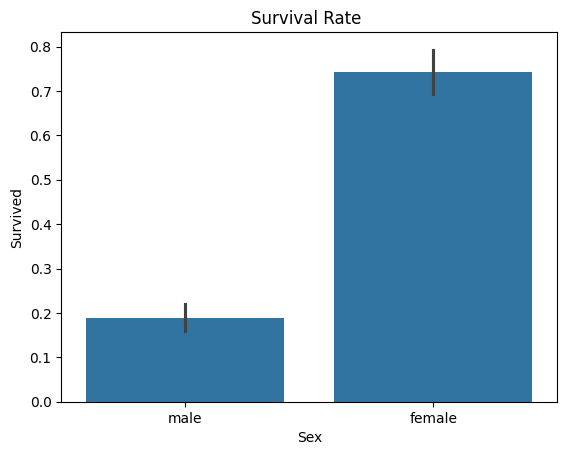

In [169]:
sns.barplot(x="Sex", y="Survived", data=train_data)
plt.title("Survival Rate ")
plt.show()

In [170]:
train_data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [171]:
train_data.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

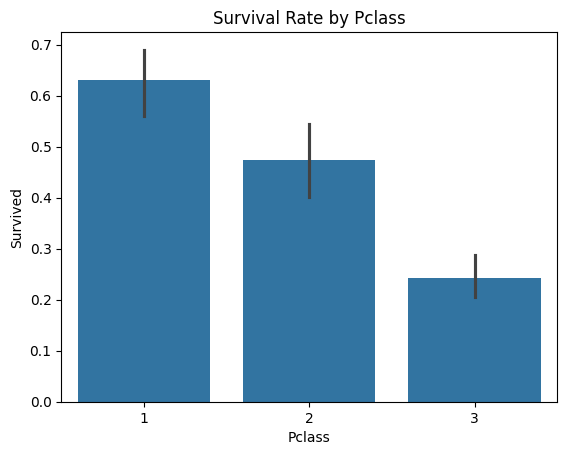

In [172]:
sns.barplot(x="Pclass", y="Survived", data=train_data)
plt.title("Survival Rate by Pclass")
plt.show()

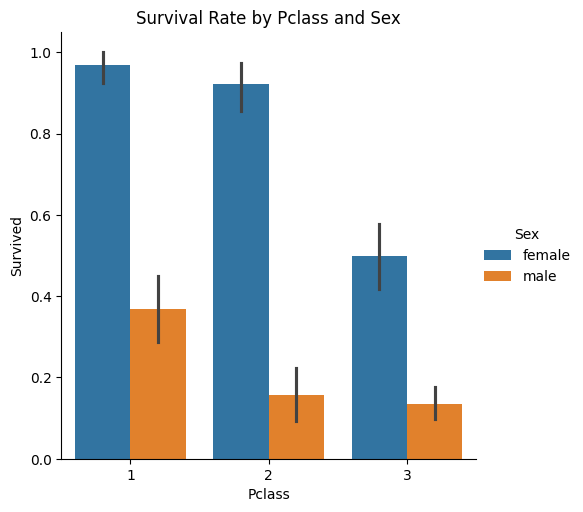

In [173]:
sns.catplot(x="Pclass", y="Survived", hue='Sex', kind="bar", data=train_data)
plt.title("Survival Rate by Pclass and Sex")
plt.show()


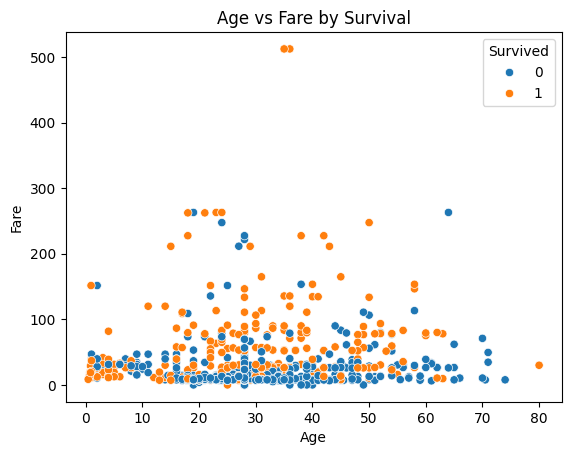

In [174]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train_data)
plt.title("Age vs Fare by Survival")
plt.show()

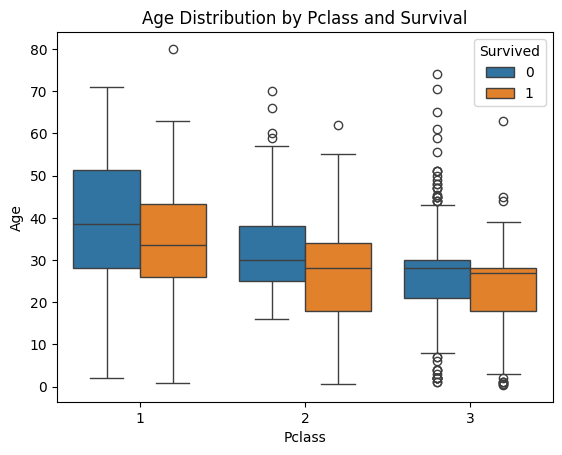

In [175]:
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=train_data)
plt.title("Age Distribution by Pclass and Survival")
plt.show()

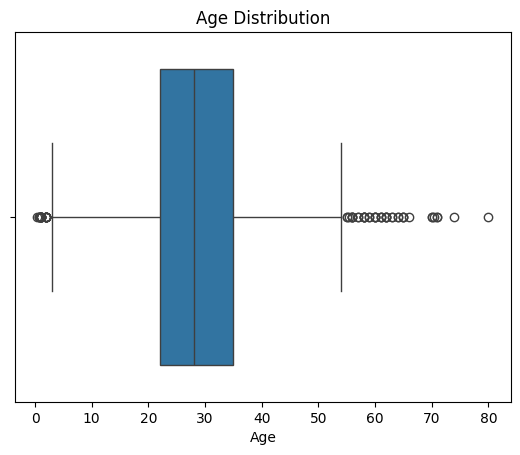

In [176]:
sns.boxplot(x="Age", data=train_data)
plt.title("Age Distribution")
plt.show()

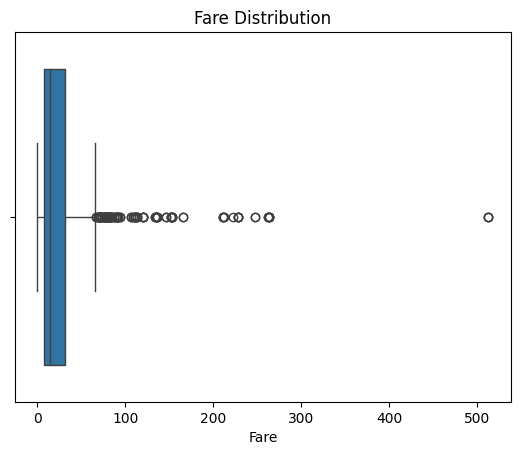

In [177]:
sns.boxplot(x="Fare", data=train_data)
plt.title("Fare Distribution")
plt.show()

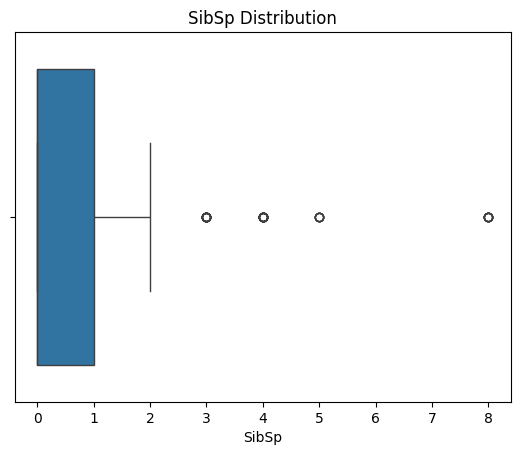

In [178]:
sns.boxplot(x='SibSp', data=train_data)
plt.title("SibSp Distribution")
plt.show()

In [179]:
train_data['Fare'] = np.log1p(train_data['Fare'])

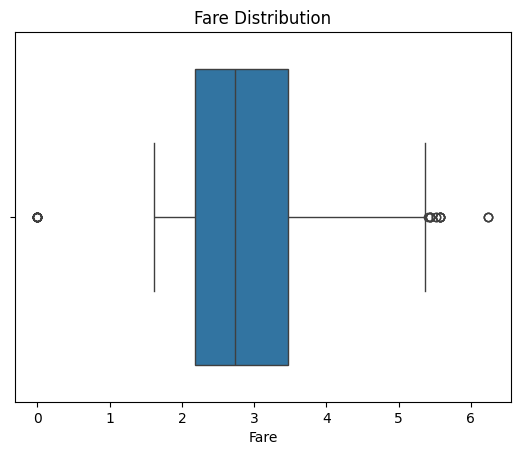

In [180]:
sns.boxplot(x="Fare", data=train_data)
plt.title("Fare Distribution")
plt.show()

In [181]:
categorical_cols= ["Sex", "Embarked", "Pclass"]
train_data= pd.get_dummies(train_data, columns=categorical_cols, drop_first=True)

In [182]:
train_data.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,2.110213,True,False,True,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,4.280593,False,False,False,False,False
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,2.188856,False,False,True,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,3.990834,False,False,True,False,False
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,2.202765,True,False,True,False,True


In [183]:
train_data.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,2.110213,True,False,True,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,4.280593,False,False,False,False,False
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,2.188856,False,False,True,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,3.990834,False,False,True,False,False
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,2.202765,True,False,True,False,True


In [184]:
# Unvan çıkarımı
train_data['Title'] = train_data['Name'].apply(
    lambda name: re.search(r' ([A-Za-z]+)\.', name).group(1) if re.search(r' ([A-Za-z]+)\.', name) else ''
)
title_map = {...}
train_data['Title'] = train_data['Title'].replace(title_map)

# Aile bilgisi
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
train_data['IsAlone'] = (train_data['FamilySize'] == 1).astype(int)




C:\Users\nihat\AppData\Local\Temp\ipykernel_3128\3361888134.py:6: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  train_data['Title'] = train_data['Title'].replace(title_map)


In [185]:
# Gereksiz sütunları sil
train_data = train_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [186]:
train_data.isnull().sum()

Survived      0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
Pclass_2      0
Pclass_3      0
Title         0
FamilySize    0
IsAlone       0
dtype: int64

In [187]:
train_data.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [188]:
title_map = {
    "Mlle": "Miss", "Ms": "Miss", "Mme": "Mrs",
    "Lady": "Rare", "Countess": "Rare", "Capt": "Rare", "Col": "Rare",
    "Don": "Rare", "Dr": "Rare", "Major": "Rare", "Rev": "Rare",
    "Sir": "Rare", "Jonkheer": "Rare"
}
train_data['Title'] = train_data['Title'].replace(title_map)


In [189]:
train_data = pd.get_dummies(train_data, columns=['Title'], drop_first=True)


In [190]:
train_data.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,FamilySize,IsAlone,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,22.0,1,0,2.110213,True,False,True,False,True,2,0,False,True,False,False
1,1,38.0,1,0,4.280593,False,False,False,False,False,2,0,False,False,True,False
2,1,26.0,0,0,2.188856,False,False,True,False,True,1,1,True,False,False,False
3,1,35.0,1,0,3.990834,False,False,True,False,False,2,0,False,False,True,False
4,0,35.0,0,0,2.202765,True,False,True,False,True,1,1,False,True,False,False


In [191]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

In [192]:
X= train_data.drop('Survived', axis=1)
y= train_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [193]:
model= LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [ ]:
#accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")



Accuracy: 0.81
Confusion Matrix:


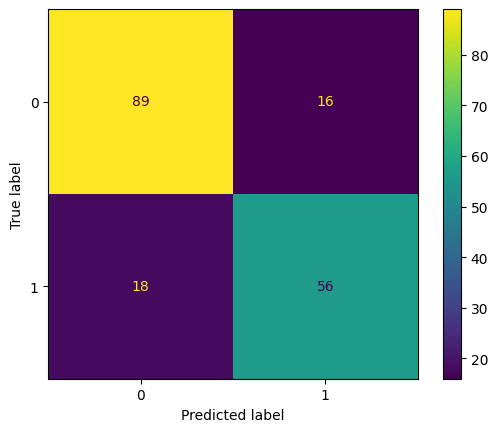

In [196]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

F1 Score: 0.77
ROC AUC: 0.89


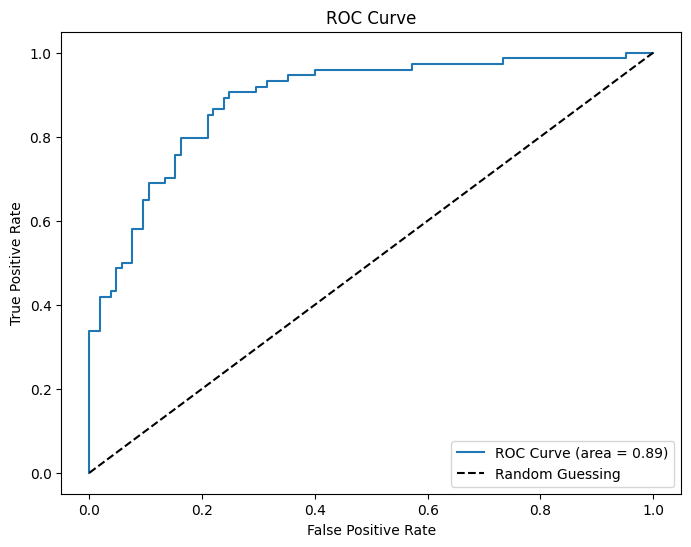

In [197]:
#precision, recall, f1-score
print(classification_report(y_test, y_pred))
#f1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")
# ROC AUC
from sklearn.metrics import roc_auc_score, roc_curve
y_pred_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC: {roc_auc:.2f}")
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()